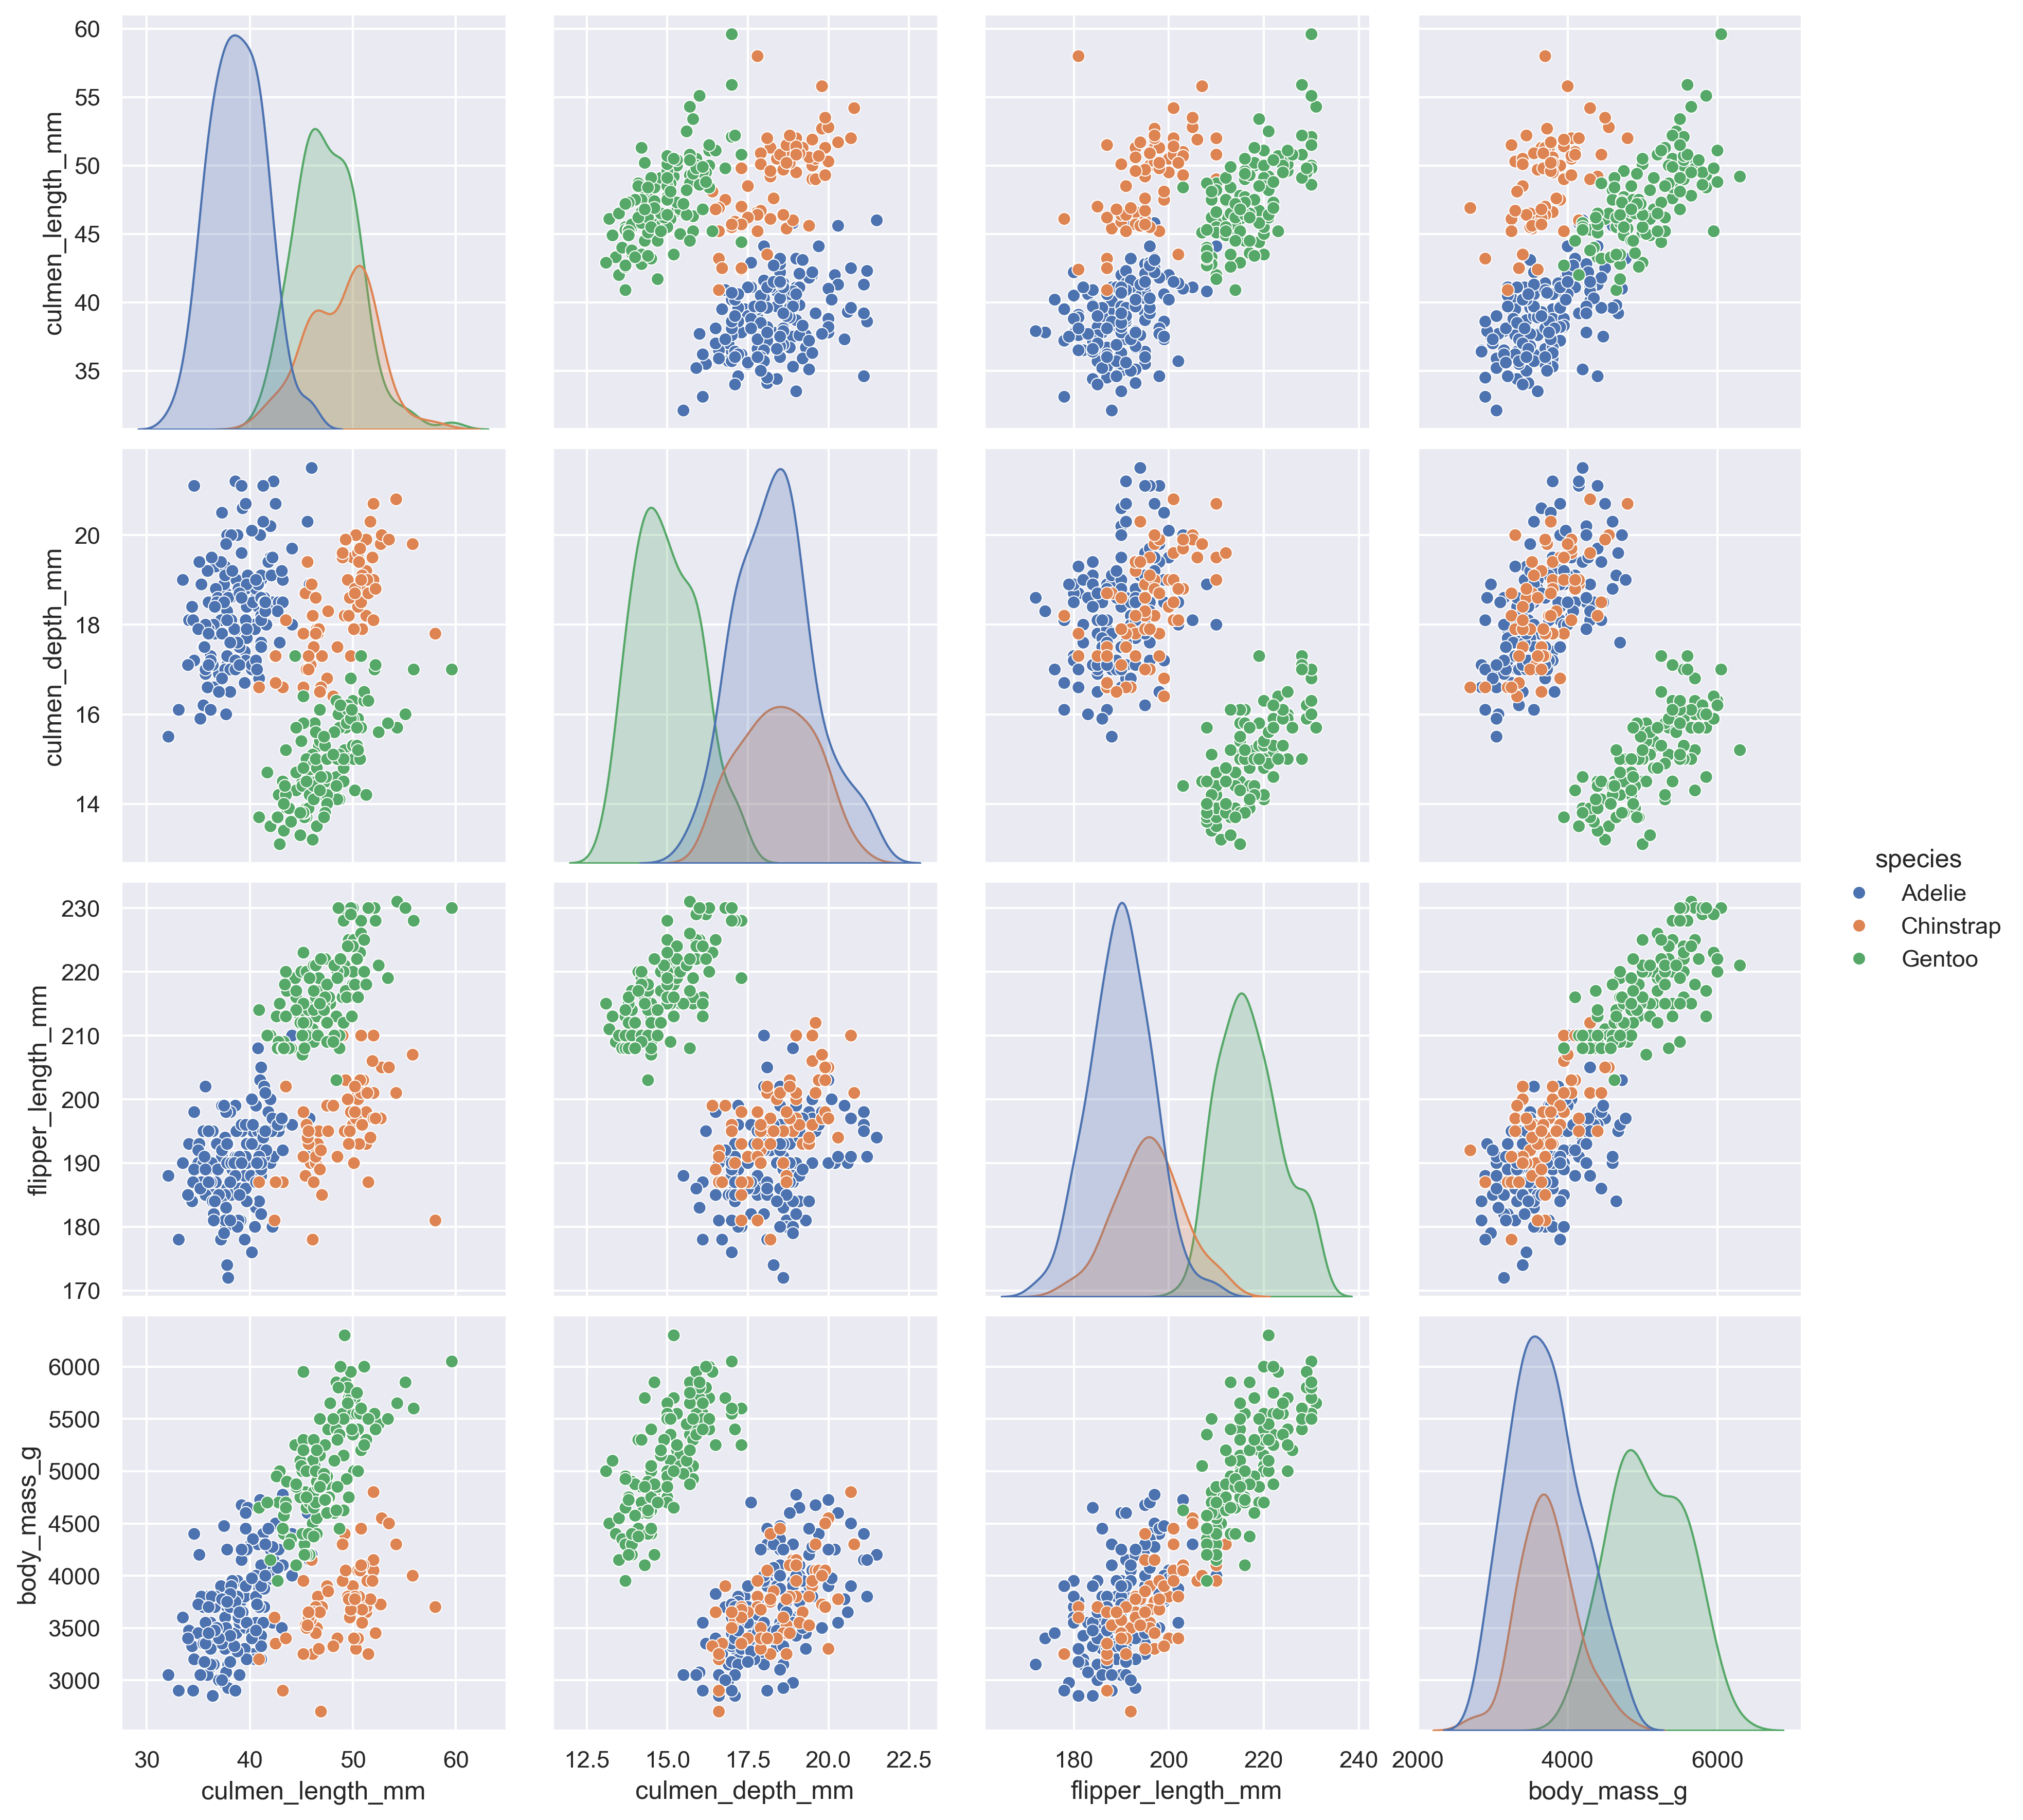

In [34]:
import pandas as pd
import numpy as np
df = pd.read_csv("penguins.csv")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc = {"figure.figsize": (12,8), "figure.dpi" : 300})
sns.pairplot(data, hue = "species", height=3)

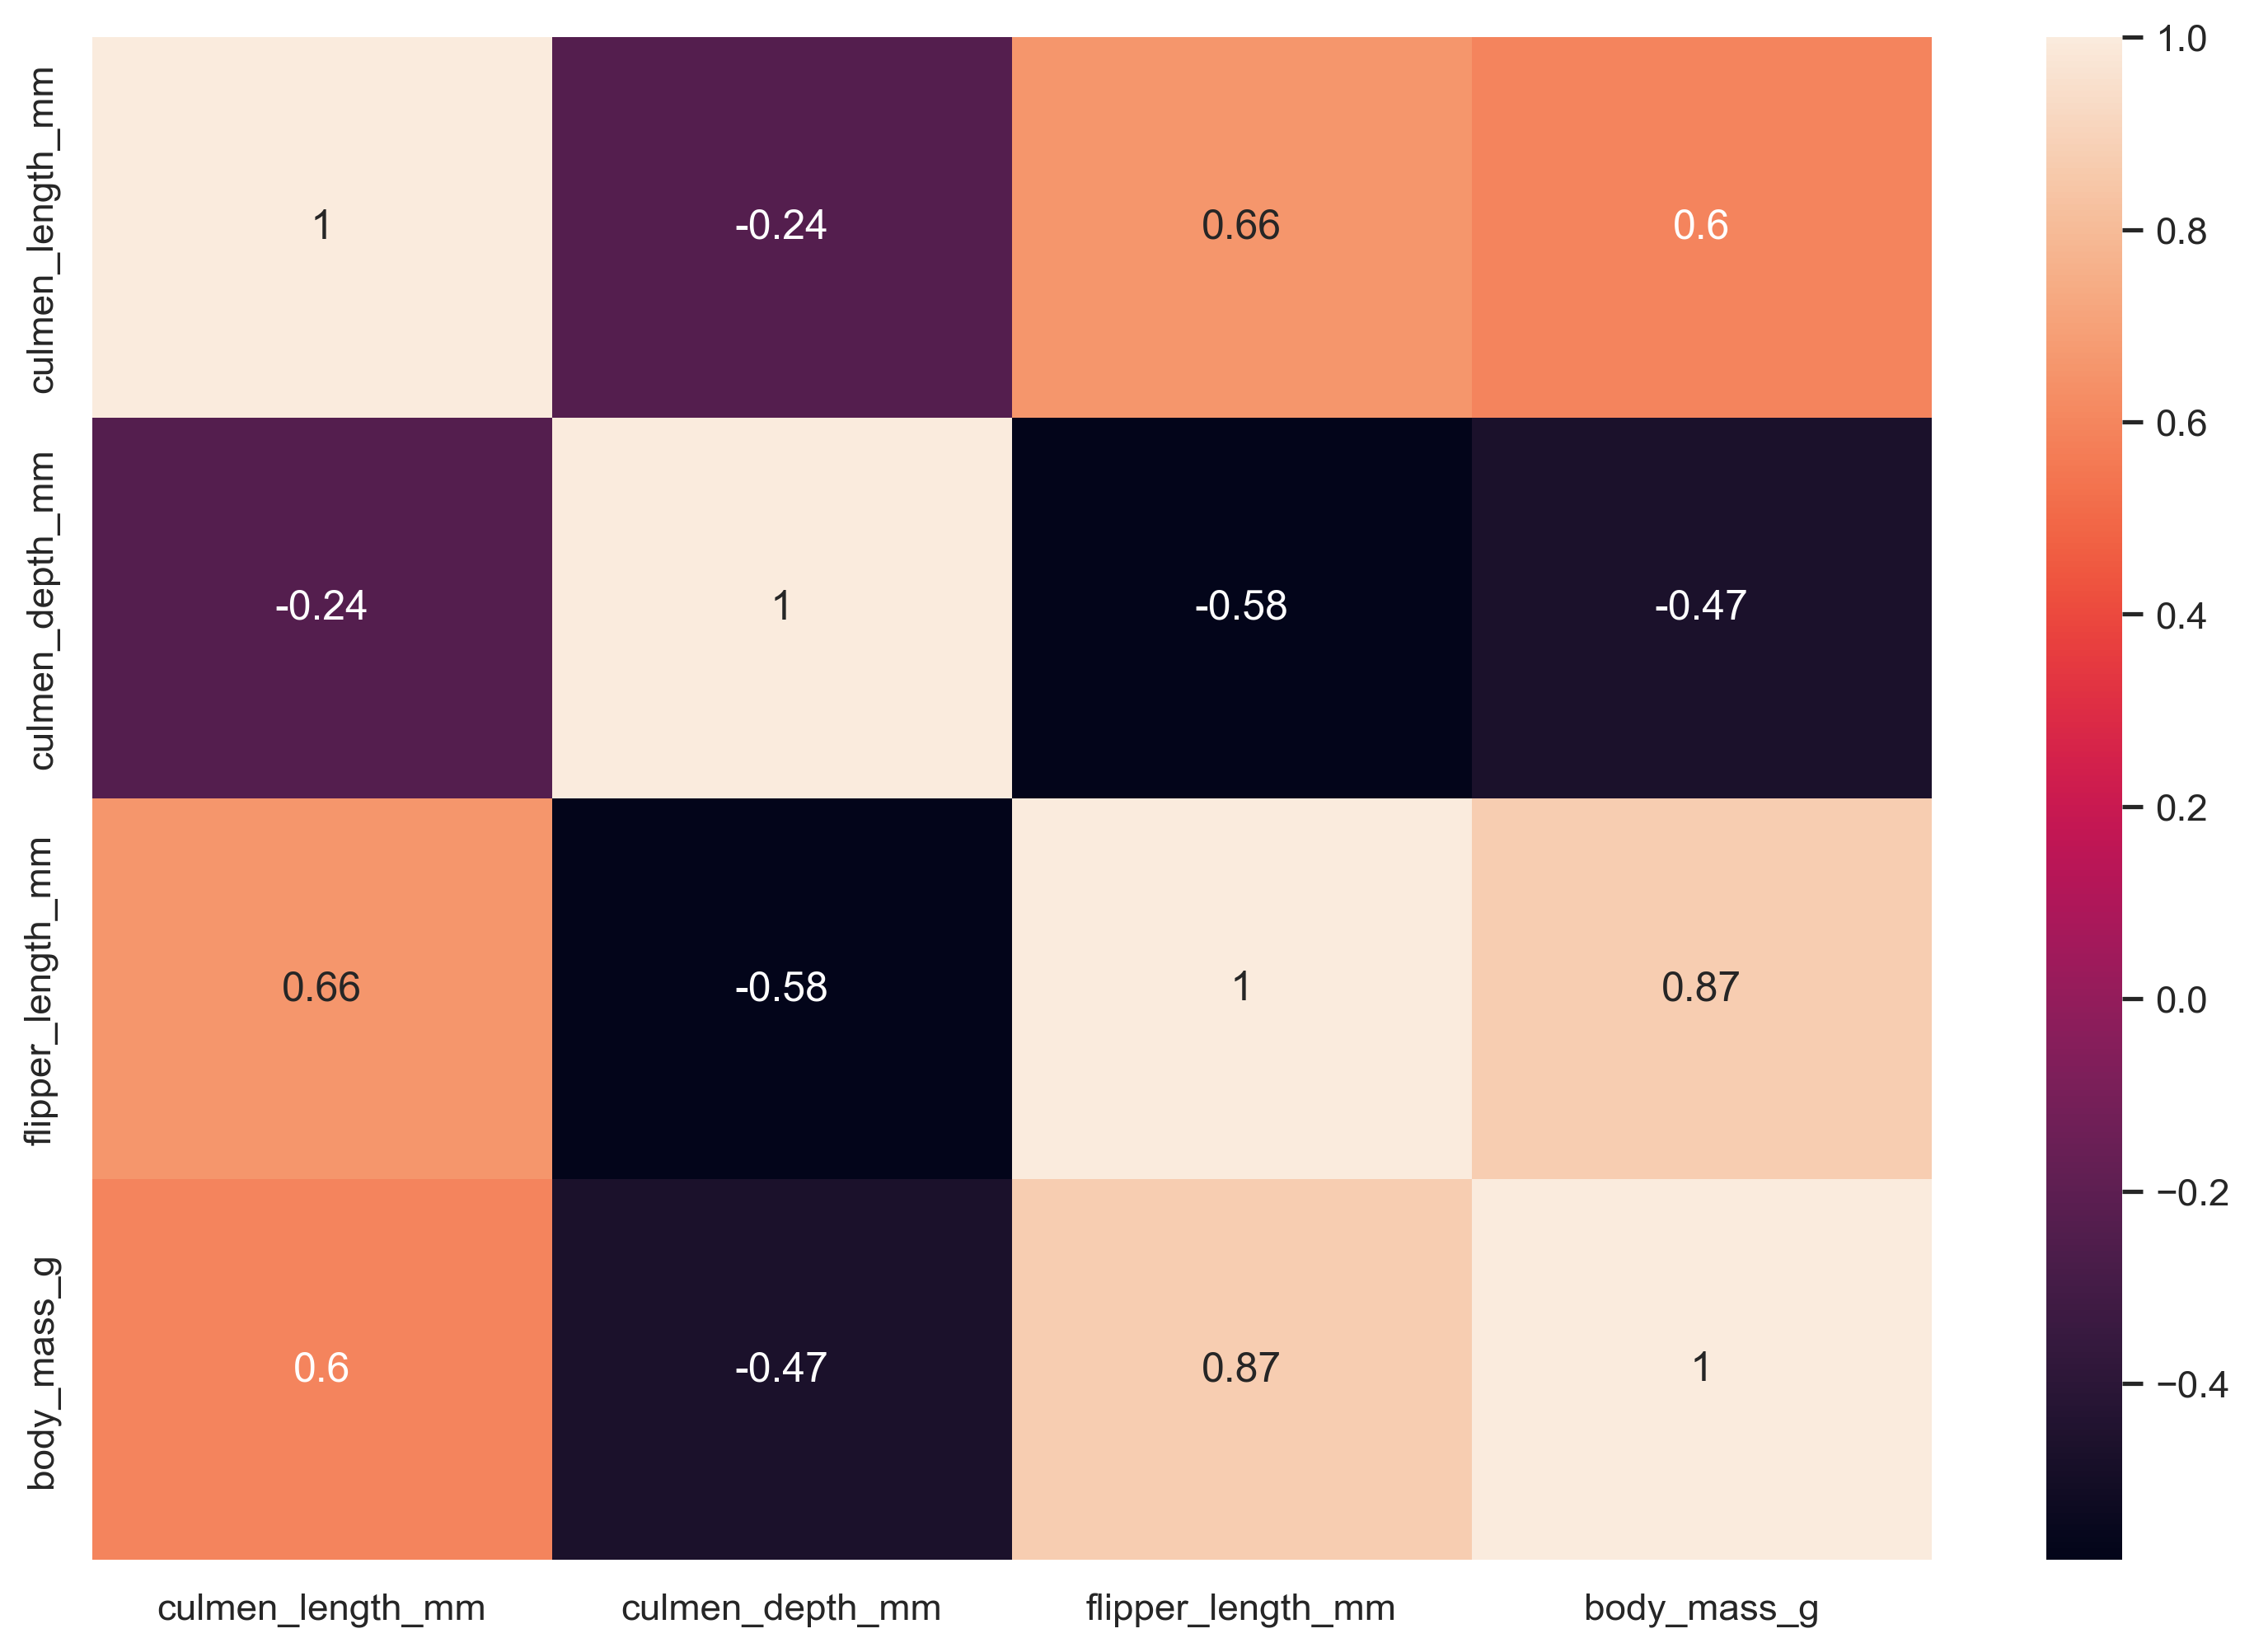

In [20]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_cols.corr()

# Create a heatmap
sns.heatmap(corr, annot=True)

# Show the plot
plt.show()



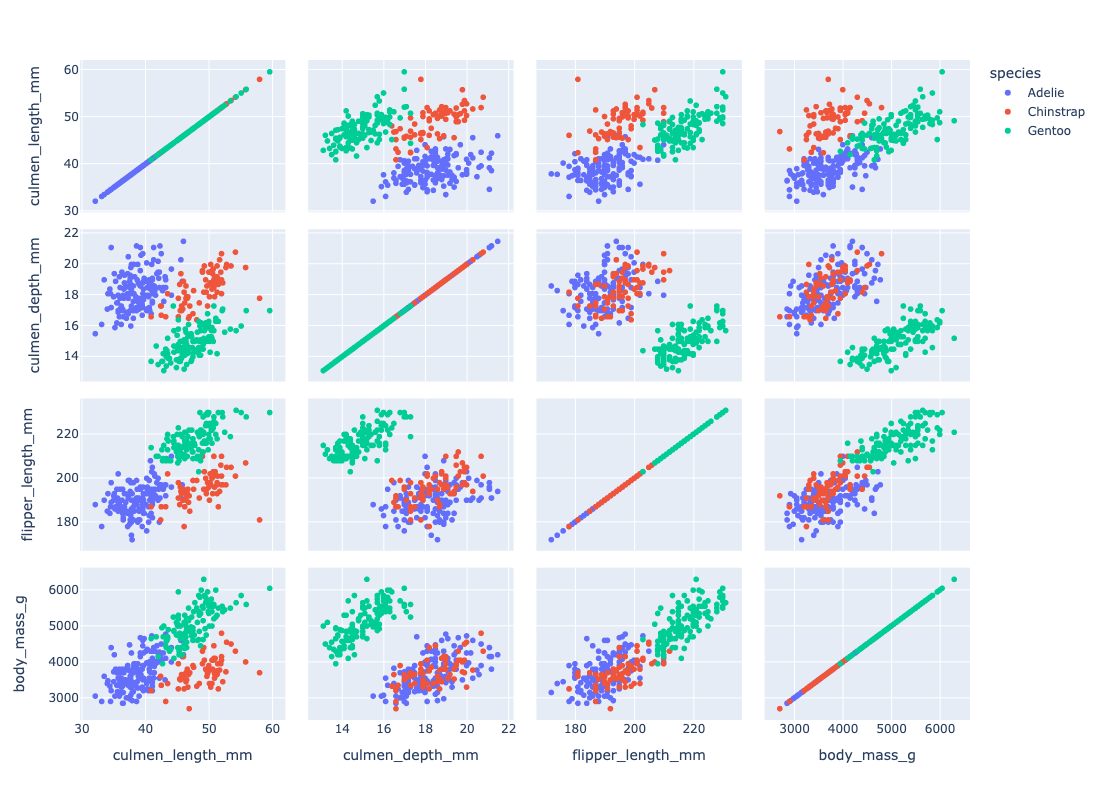

In [28]:
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv("penguins.csv")

# Define category orders
category_orders = {"species": ["Adelie", "Chinstrap", "Gentoo"]}

# Create an interactive scatter matrix plot with customized category order and larger size
fig = px.scatter_matrix(df, dimensions=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"], 
                        color="species", category_orders=category_orders,
                        width=1200, height=800)  # Set width and height

# Show the plot
fig.show()



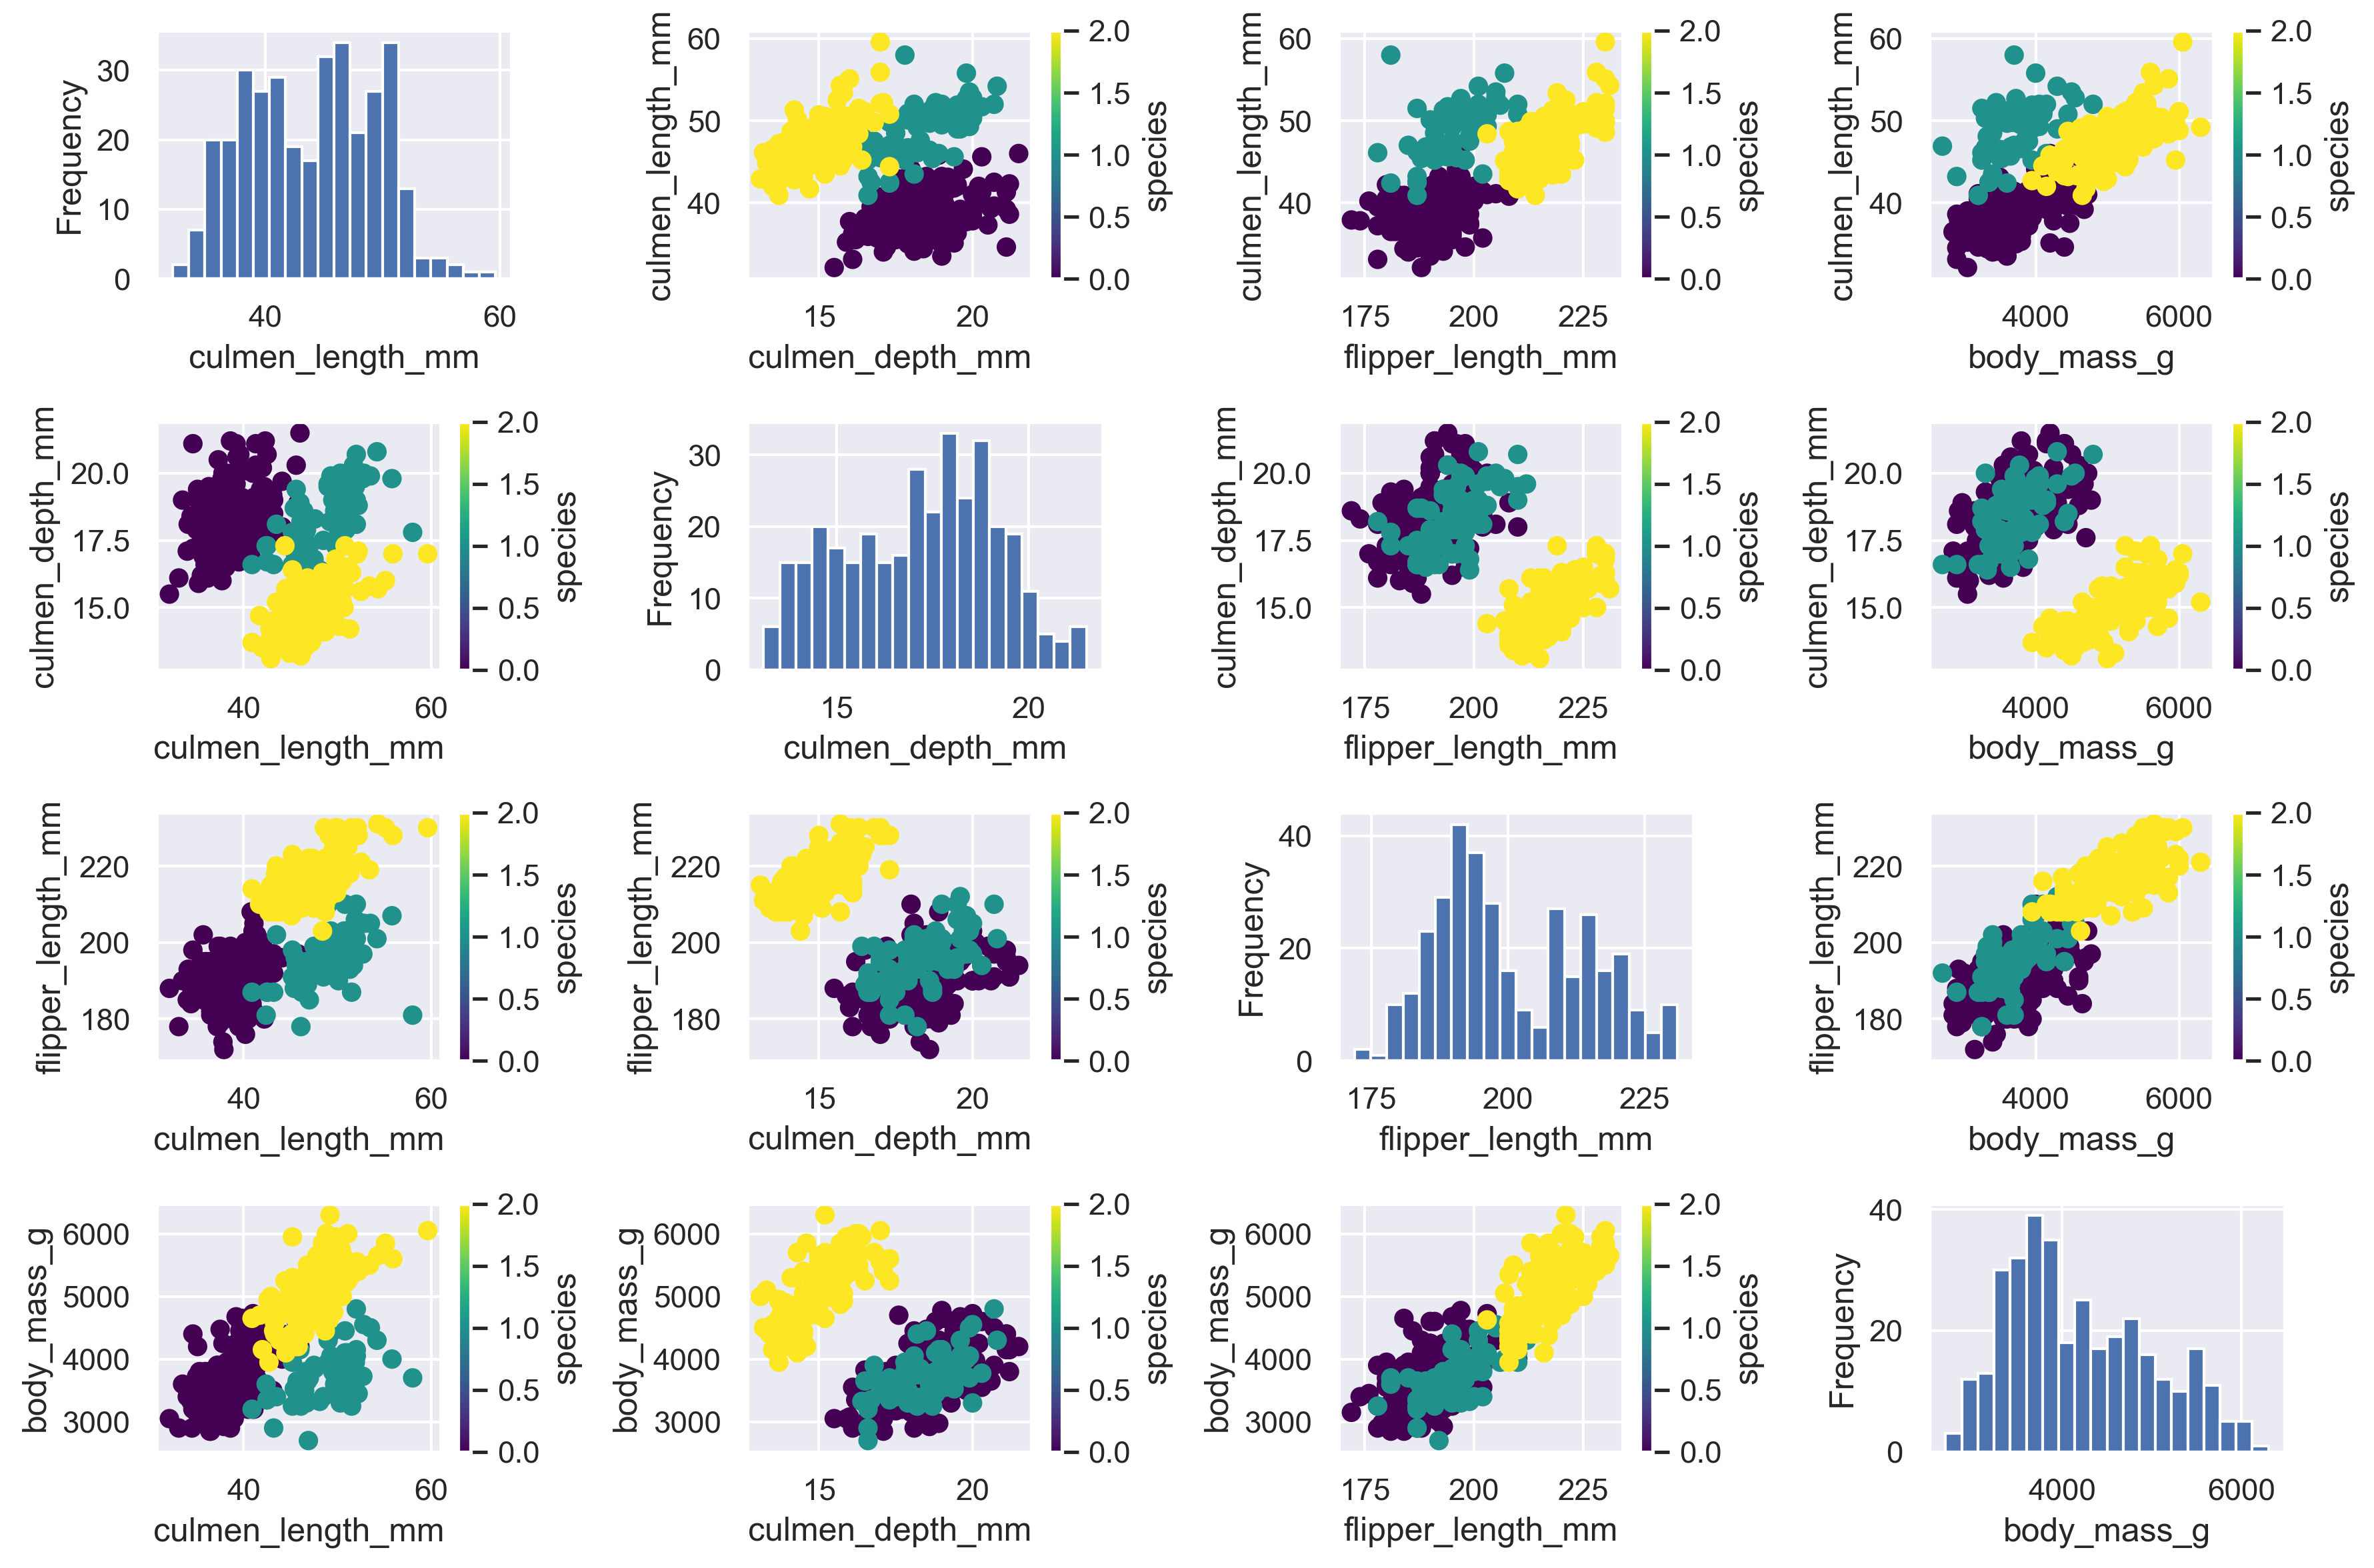

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("penguins.csv")

# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Set the figure size
plt.figure(figsize=(12, 8))

# Create scatter plots and histograms
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        plt.subplot(len(numeric_columns), len(numeric_columns), i * len(numeric_columns) + j + 1)
        if i == j:
            plt.hist(df[col1], bins=20)  # Histogram
            plt.xlabel(col1)
            plt.ylabel('Frequency')
        else:
            plt.scatter(df[col2], df[col1], c=pd.factorize(df['species'])[0], cmap='viridis')  # Scatter plot
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.colorbar(label='species')

plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot

# Load the data
df = pd.read_csv("penguins.csv")

# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Define category orders
category_orders = {"species": ["Adelie", "Chinstrap", "Gentoo"]}

# Define color palette for species
species_palette = {'Adelie': 'blue', 'Chinstrap': 'green', 'Gentoo': 'red'}
df['color'] = df['species'].map(species_palette)

# Create scatter plots and histograms
plots = []
for i, col1 in enumerate(numeric_columns):
    row_plots = []
    for j, col2 in enumerate(numeric_columns):
        if i == j:
            hist, edges = np.histogram(df[col1].dropna(), bins=20)  # Drop NaN values
            p = figure(title=f"{col1} Histogram", background_fill_color="#fafafa")
            p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white", alpha=0.5)
            p.xaxis.axis_label = col1
            p.yaxis.axis_label = 'Frequency'
        else:
            p = figure(title=f"{col1} vs {col2}", background_fill_color="#fafafa")
            p.circle(df[col2], df[col1], color=df['color'], legend_label='species')
            p.xaxis.axis_label = col2
            p.yaxis.axis_label = col1
        row_plots.append(p)
    plots.append(row_plots)

# Arrange plots into a grid
grid = gridplot(plots)

# Show the plot
show(grid)
